In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:
data = pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
122,6.7,3.0,5.2,2.3,Iris-virginica
123,6.3,2.5,5.0,1.9,Iris-virginica
124,6.5,3.0,5.2,2.0,Iris-virginica
125,6.2,3.4,5.4,2.3,Iris-virginica


# Data Visualization

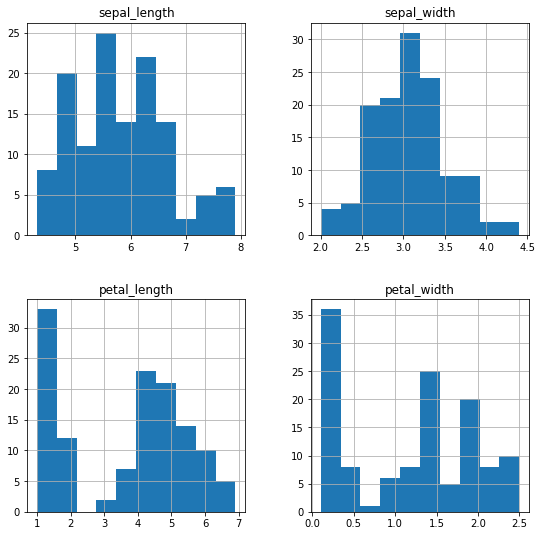

In [ ]:
data.hist(figsize=(9,9))
plt.show()

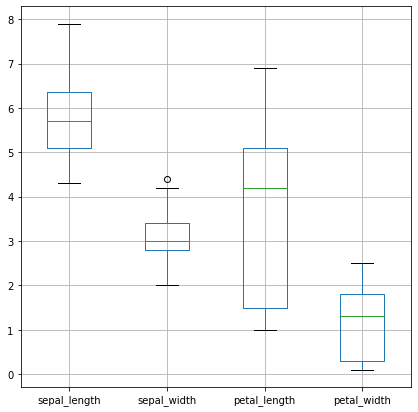

In [ ]:
data.boxplot(figsize=(7,7))
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  127 non-null    float64
 1   sepal_width   127 non-null    float64
 2   petal_length  127 non-null    float64
 3   petal_width   127 non-null    float64
 4   species       127 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.1+ KB


In [ ]:
print(data['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


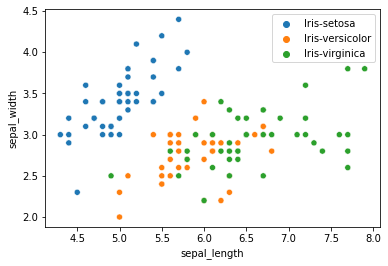

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',hue='species',data=data)
plt.legend()
plt.show()

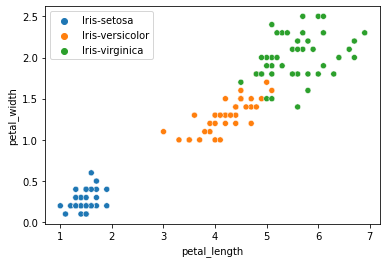

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',hue='species',data=data)
plt.legend()
plt.show()

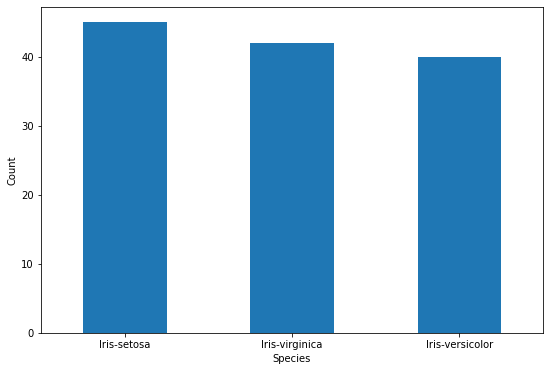

Iris-setosa        45
Iris-virginica     42
Iris-versicolor    40
Name: species, dtype: int64


In [ ]:
data.species.value_counts().plot(kind='bar',figsize=(9,6))
plt.xlabel('Species')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()
print(data.species.value_counts())

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,127.00000,127.000000,127.000000,127.000000
mean,5.81811,3.052756,3.699213,1.164567
std,0.83594,0.448069,1.802357,0.765893
min,4.30000,2.000000,1.000000,0.100000
25%,5.10000,2.800000,1.500000,0.300000
50%,5.70000,3.000000,4.200000,1.300000
75%,6.35000,3.400000,5.100000,1.800000
max,7.90000,4.400000,6.900000,2.500000


# Cleaning Dataset

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
print('data shape before removing duplicates ',data.shape)
data = data.drop_duplicates()
print('----------------------------------------------------')
print('data shape after removing duplicates ',data.shape)

data shape before removing duplicates  (127, 5)
----------------------------------------------------
data shape after removing duplicates  (125, 5)


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

species = data['species']
data['species'] = label_encoder.fit_transform(data['species'])
data

C:\Users\Right-Click\AppData\Local\Temp\ipykernel_7712\395610086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['species'] = label_encoder.fit_transform(data['species'])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
122,6.7,3.0,5.2,2.3,2
123,6.3,2.5,5.0,1.9,2
124,6.5,3.0,5.2,2.0,2
125,6.2,3.4,5.4,2.3,2


# Split Dataset into train and test

In [ ]:
X = data.drop(['species'],axis=1)
y = data['species']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test ,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print('x_train_shape : ',x_train.shape)
print('y_train_shape : ',y_train.shape)
print('x_test_shape : ',x_test.shape)
print('y_test_shape : ',y_test.shape)

x_train_shape :  (87, 4)
y_train_shape :  (87,)
x_test_shape :  (38, 4)
y_test_shape :  (38,)


# Training Models

### logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)
print(LR_model.score(x_train,y_train))
print(LR_model.score(x_test,y_test))

0.9770114942528736
0.9473684210526315


D:\Programs\Python Program\Anaconda_Installation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVC

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train,y_train)
print(svc_model.score(x_train,y_train))
print(svc_model.score(x_test,y_test))

0.9770114942528736
0.9210526315789473


In [ ]:
from sklearn.model_selection import GridSearchCV

svc_param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'kernel': ['linear']}
SVC_CV= GridSearchCV(svc_model, param_grid = svc_param_grid, cv=5, return_train_score = True )
SVC_CV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']},
             return_train_score=True)

In [ ]:
SVC_CV.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
best_SVC = SVC_CV.best_estimator_
best_SVC.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
best_SVC.fit(x_train,y_train)
best_SVC.score(x_train,y_train)

0.9885057471264368

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
print(DT_model.score(x_train,y_train))
print(DT_model.score(x_test,y_test))

1.0
0.9210526315789473


In [ ]:
DT_params_grid = {'criterion':['gini','entropy']}
DT_CV= GridSearchCV(DT_model, param_grid = DT_params_grid, cv=5, return_train_score = True ) # , n_jobs=-1
DT_CV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']},
             return_train_score=True)

In [ ]:
DT_CV.best_params_

{'criterion': 'gini'}

In [ ]:
best_DT = DT_CV.best_estimator_
best_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
best_DT.fit(x_train,y_train)
best_DT.score(x_train,y_train)

1.0

### stacking Technique

In [ ]:
from sklearn.ensemble import StackingClassifier

models = [('Decission Tree',best_DT),('SVC',best_SVC),('Logistic Regression',LR_model)]
stack = StackingClassifier(models ,cv=5 ,final_estimator=LogisticRegression())

In [ ]:
stack.fit(x_train,y_train)

print(stack.score(x_train,y_train))
print(stack.score(x_test,y_test))

0.9885057471264368
0.9210526315789473


D:\Programs\Python Program\Anaconda_Installation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
predictions = stack.predict(x_test)

# Metrics

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_curve

In [ ]:
print(confusion_matrix(y_test,predictions))

[[ 6  0  0]
 [ 0 12  3]
 [ 0  0 17]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.80      0.89        15
           2       0.85      1.00      0.92        17

    accuracy                           0.92        38
   macro avg       0.95      0.93      0.94        38
weighted avg       0.93      0.92      0.92        38



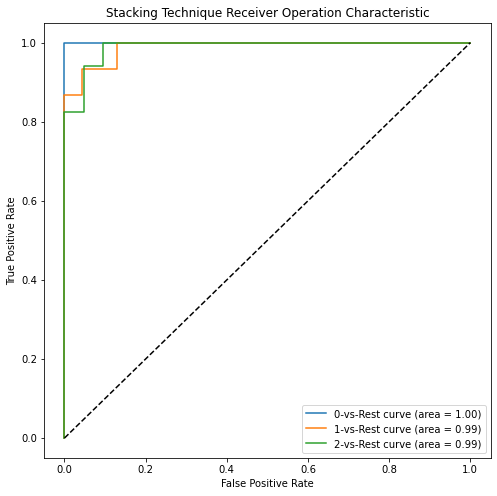

In [ ]:
def rocAuc(model, Xtest, ytest, model_name):
    cols = model.classes_
    y_test_binarized = pd.get_dummies(ytest, prefix=['Class'])
    try:
        score = model.decision_function(Xtest)
    except:
        score = model.predict_proba(Xtest)

    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:,i],score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])

    plt.figure(figsize=(8,8))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i],tpr[i], label=f'{cols[i]}-vs-Rest curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Receiver Operation Characteristic")
    plt.legend(loc='lower right')
    plt.show()

rocAuc(stack, x_test, y_test, 'Stacking Technique')

In [ ]:
hidden_set = pd.read_csv('IRIS_test_hidden.csv')
hidden_set.shape

(23, 4)

In [ ]:
hidden_set = hidden_set.drop_duplicates()
hidden_set.shape

(23, 4)

In [ ]:
hidden_prediction = stack.predict(hidden_set)
hidden_prediction = pd.DataFrame(hidden_prediction)

In [ ]:
hidden_prediction.to_csv('prediction_Amaal.csv',index=False)